<a href="https://colab.research.google.com/github/Mehadi4021/Digital-Image-Processing_Lab_CSE438/blob/main/Experiment_No6_DIP_Lab_Day_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab.patches import cv2_imshow
import numpy as np
import cv2
import matplotlib.pyplot as plt

### **Linear vs. Nonlinear Transformation of Image Intensity**

When processing images, intensity transformations modify pixel values to achieve desired effects like **brightness adjustment, contrast enhancement, or gamma correction**. These transformations can be classified as **linear** or **nonlinear** based on how pixel values are altered.

---

## **1️⃣ Linear Transformation**
### **Definition:**
A linear transformation of image intensity applies a direct proportionality between input and output pixel values:

\[
I_{\text{output}} = a I_{\text{input}} + b
\]

Where:
- \( I_{\text{input}} \) = original pixel intensity
- \( I_{\text{output}} \) = transformed pixel intensity
- \( a \) = scaling factor (controls contrast)
- \( b \) = bias (controls brightness)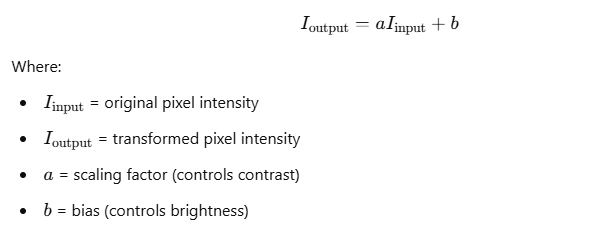

### **Characteristics:**
✅ **Preserves straight-line relationships** in intensity values  
✅ **Easy to compute** and apply  
✅ **Suitable for basic contrast and brightness adjustments**  
❌ **Cannot adapt to human vision perception (nonlinear response)**  

### **Examples:**
1. **Brightness Adjustment:** Adding a constant to pixel values:
 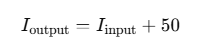  
   - This shifts all intensities uniformly, making the image **brighter**.

2. **Contrast Scaling:** Multiplying by a factor:
   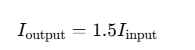
   - This increases the difference between light and dark regions, **enhancing contrast**.

3. **Negative Transformation:** Inverts image intensity:
  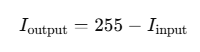
   - Converts a **light image to a dark one** and vice versa.

### **Limitations of Linear Transformations:**
- **Cannot handle nonlinear characteristics of displays and cameras**  
- **Cannot adapt to human vision, which perceives brightness nonlinearly**  
- **Fails to enhance details in dark or bright regions effectively**  

---

## **2️⃣ Nonlinear Transformation**
### **Definition:**
A nonlinear transformation **modifies pixel intensity in a way that is not directly proportional** to the input. This is crucial for handling **gamma correction, logarithmic scaling, histogram equalization, and adaptive contrast enhancement**.

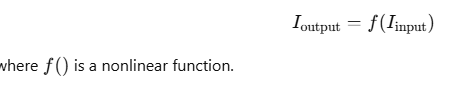

### **Characteristics:**
✅ **Matches human vision perception (e.g., gamma correction)**  
✅ **Can selectively enhance details in shadows or highlights**  
✅ **Useful for advanced image enhancement techniques**  
❌ **Computationally more expensive than linear transformations**  

### **Examples:**
1. **Gamma Correction (Perceptual Brightness Adjustment)**  
 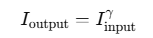  
   - **If \( \gamma < 1 \)** → Brightens the image (useful for dark images)
   - **If \( \gamma > 1 \)** → Darkens the image (useful for overly bright images)
   - Helps match **human vision**, which is more sensitive to dark areas.

2. **Logarithmic Transformation (Dark Region Enhancement)**  
  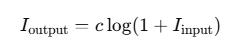
   - Compresses **high-intensity values**, making dark details more visible.

3. **Histogram Equalization (Adaptive Contrast Enhancement)**  
   - Redistributes intensity values so that **all brightness levels appear equally**, improving contrast in low-contrast images.
   - Useful for **medical imaging, night vision, and grayscale images**.

### **Comparison: Linear vs. Nonlinear Transformations**
| Feature           | Linear Transformation          | Nonlinear Transformation         |
|------------------|---------------------------------|---------------------------------|
| **Equation**      | \( I_{\text{output}} = a I_{\text{input}} + b \) | \( I_{\text{output}} = f(I_{\text{input}}) \) |
| **Complexity**    | Low (simple arithmetic)       | High (power/logarithmic functions) |
| **Control Over Contrast** | Basic (global scaling) | Adaptive (enhanced details in shadows & highlights) |
| **Human Perception Match** | No | Yes (gamma correction, log transform) |
| **Best Use Cases** | Brightness & contrast scaling | Display correction, detail enhancement, contrast stretching |

---

### **Conclusion**
- **Linear transformations** are good for **basic adjustments** like brightness and contrast.
- **Nonlinear transformations** are essential for **perceptual corrections and detail enhancement** in complex images.
- **Gamma correction, histogram equalization, and logarithmic transforms** are widely used nonlinear techniques to enhance images based on human vision properties.


# Gamma Correction

### Why is Gamma Correction Needed?

Gamma correction is essential in image processing and computer graphics to ensure that images appear correctly on different display devices. The key reasons for applying gamma correction include:

1. **Human Vision Perception**  
   - The human eye does not perceive brightness linearly; it is more sensitive to darker shades than brighter ones. Gamma correction adjusts the intensity values to match human perception, improving image quality and detail in darker regions.

2. **Display Characteristics**  
   - Most display devices (monitors, TVs) do not respond linearly to input brightness levels. They have a **gamma response curve**, meaning they naturally darken images. Gamma correction compensates for this by adjusting pixel values before display.

3. **Consistent Image Appearance**  
   - Without gamma correction, images may appear too dark or washed out on different screens. Correcting gamma ensures images look as intended across various devices.

4. **Prevents Loss of Detail**  
   - If gamma is not corrected, shadow and highlight details can be lost, leading to an unnatural or unrealistic appearance in images.

5. **Better Image Compression**  
   - Applying gamma correction before compression can help retain more visual detail while reducing file size efficiently.

### Gamma Correction Formula:

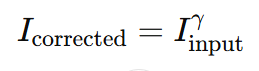\

- **γ (gamma)**: A correction factor, typically around **2.2** for most display systems.
- **If γ > 1**, it darkens the image.
- **If γ < 1**, it brightens the image.

### Example Use Case:
- If an image is stored in a **linear** color space, applying gamma correction before display ensures that brightness levels appear natural to the human eye.




### **How Gamma Correction Works in Image Processing**
Gamma correction adjusts the brightness and contrast of an image by modifying pixel intensity values using a nonlinear transformation. It **does not linearly scale brightness** but instead redistributes intensity levels in a way that aligns with **human visual perception** and **display characteristics**.

### **How It Corrects the Image**
Gamma correction **compensates for the nonlinear response** of display devices and cameras, ensuring that images appear natural. Here's how it works:

1. **Compensation for Display Gamma**  
   - Most screens have a gamma of **~2.2**, meaning they darken images. To counteract this, images are **gamma-encoded** (typically with **γ = 1/2.2 ≈ 0.45**) before being stored or transmitted.
   - When displayed, the screen’s gamma function (γ = 2.2) **undoes the encoding**, restoring the correct brightness.

2. **Matching Human Vision**  
   - The human eye is more sensitive to **dark areas** than bright ones.  
   - Without gamma correction, dark details may be lost, and bright areas may appear washed out.  
   - Applying gamma correction **redistributes brightness levels**, enhancing shadows and highlights.

---

### **How It Enhances the Image**
Gamma correction enhances an image by improving **contrast, visibility of details, and overall appearance**. Here’s how:

#### **1. Enhancing Shadows and Highlights**  
- If an image is **too dark**, applying **gamma < 1** (e.g., 0.5) brightens it, revealing hidden details in the shadows.  
- If an image is **too bright**, applying **gamma > 1** (e.g., 2.2) darkens it, improving contrast in bright areas.

#### **2. Preventing Washed-Out Colors**  
- A **wrong gamma setting** can make images look washed out or dull.  
- Correcting gamma **restores proper contrast** and vibrant colors.

#### **3. Improving Image Compression**  
- Proper gamma correction before image compression **preserves more details** while reducing file size.  
- Brightness differences are **distributed more efficiently**, making the compression process more effective.

---


---

### **Visual Effect of Different Gamma Values**
| Gamma (γ) | Effect on Image |
|-----------|----------------|
| **γ < 1** | Brightens the image (reveals shadow details) |
| **γ = 1** | No change |
| **γ > 1** | Darkens the image (enhances contrast in bright areas) |

---

### **Conclusion**
Gamma correction is **not just a brightness adjustment**—it corrects nonlinearities in image perception and display, making images look **more natural, detailed, and visually appealing**. 🚀



## Why normalize to [0,1]?

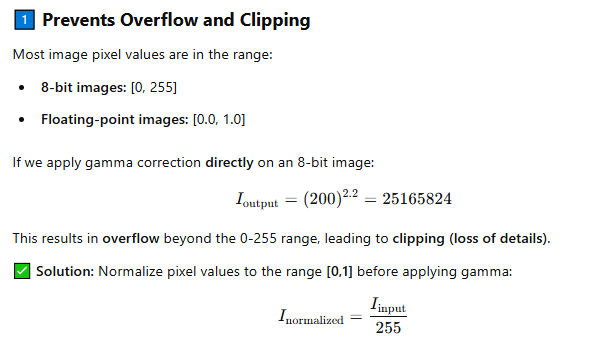

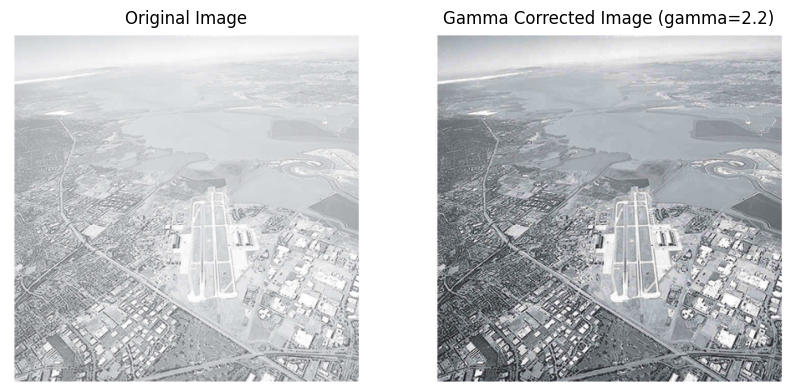

In [ ]:

# Function to apply gamma correction
def gamma_correction(image, gamma):

    # Normalize the image to the range [0, 1]
    image_normalized = image / 255.0

    # Apply the gamma correction formula: output = input^gamma
    corrected_image = np.power(image_normalized, gamma)

    # Scale back to the range [0, 255] and convert to an 8-bit image
    corrected_image = np.uint8(corrected_image * 255)

    return corrected_image

# Read the uploaded image using OpenCV
image_path = "/content/drive/MyDrive/DIP_Lab/Day_6/airport_pic.png"  # Get the filename of the uploaded image
image = cv2.imread(image_path)

# Convert the image from BGR to RGB (for display with matplotlib)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Apply gamma correction with gamma = 2.2 (for darkening effect)
gamma_value = 2.2
gamma_corrected_image = gamma_correction(image_rgb, gamma_value)

# Display original and gamma-corrected images side by side
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

# Gamma Corrected Image
plt.subplot(1, 2, 2)
plt.imshow(gamma_corrected_image)
plt.title(f'Gamma Corrected Image (gamma={gamma_value})')
plt.axis('off')

# Show the plots
plt.show()


# Contrast Stretching

### **Contrast Stretching & Its Importance in Image Enhancement**  

#### **🔹 What is Contrast Stretching?**
Contrast stretching (also known as **normalization** or **min-max scaling**) is a technique used to improve the contrast of an image by **expanding the range of intensity values**.  

**Formula:**
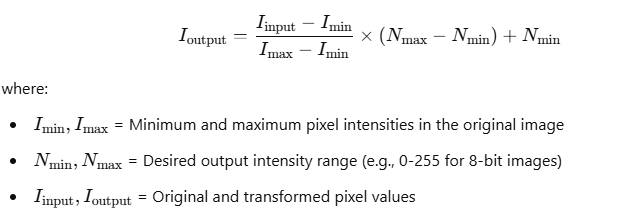
This **spreads out pixel intensities**, making details more visible.  

---

## **🔹 Why Do We Need Contrast Stretching?**
Many images suffer from **poor contrast** due to lighting conditions, overexposure, or sensor limitations. This results in a **narrow range of pixel intensities**, making details hard to distinguish.

**Example:**
- A foggy image may have pixel values between **100-150** (instead of 0-255).  
- Contrast stretching **maps the values to the full range (0-255)**, making the image **clearer and sharper**.

✅ **Fixes Low-Contrast Issues**  
✅ **Enhances Details in Dark or Bright Regions**  
✅ **Improves Readability & Clarity in Medical and Satellite Images**  

---

## **🔹 Why is Enhancing Contrast Important?**
1. **Improves Human Perception** 🧠  
   - The human eye distinguishes objects better when there is a **larger difference between dark and bright regions**.
   - Low-contrast images appear **dull and washed out**.

2. **Enhances Object Recognition** 🔍  
   - High contrast makes objects, edges, and textures **easier to detect**.
   - Used in **medical imaging, security cameras, and computer vision**.

3. **Boosts Machine Learning & AI Performance** 🤖  
   - Many AI algorithms (like edge detection and object tracking) **work better with high-contrast images**.
   - Poor contrast can reduce accuracy in **face recognition, OCR, and remote sensing**.

---

## **🔹 Why Spreading Out the Intensity Range is Important for Image Visuality?**
### **🔸 1. Expands the Dynamic Range**
- A **narrow range of intensities** makes images **flat and uninformative**.
- Expanding the range **reveals hidden details** in shadows and highlights.

### **🔸 2. Corrects Uneven Lighting**
- If an image is **too dark (underexposed) or too bright (overexposed)**, contrast stretching balances brightness and contrast.

### **🔸 3. Enhances Texture & Edges**
- Small variations in intensity become more **visible**, making textures **sharper**.



---

## **🔹 Conclusion**
✅ **Contrast stretching improves visibility by expanding pixel intensity range.**  
✅ **Essential for applications like medical imaging, surveillance, and computer vision.**  
✅ **Enhancing contrast makes details easier to see and improves AI performance.**  



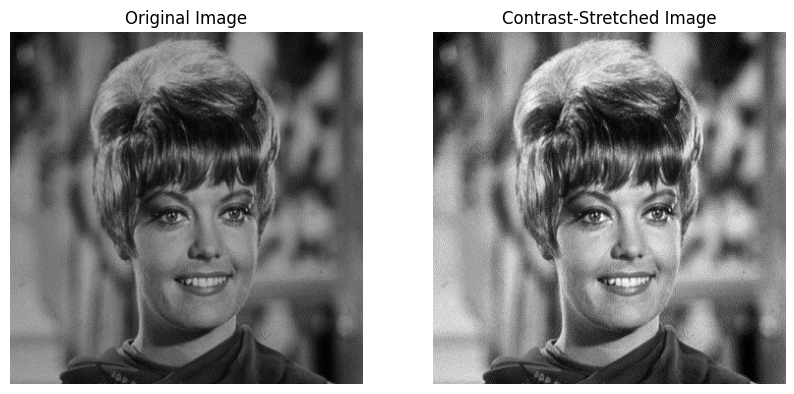

In [ ]:

# Function to perform contrast stretching
def contrast_stretching(image):
    """
    Perform contrast stretching on the input image.

    Parameters:
        image (numpy array): The input image to be processed.

    Returns:
        stretched_image (numpy array): The contrast-stretched image.
    """
    # Convert image to grayscale for simplicity (optional for color images)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Find the minimum and maximum pixel values in the image
    I_min = np.min(gray_image)
    I_max = np.max(gray_image)

    # Apply the contrast stretching formula
    stretched_image = (gray_image - I_min) / (I_max - I_min) * 255

    # Convert the stretched image to uint8 type (8-bit image)
    stretched_image = np.uint8(stretched_image)

    return stretched_image

# Read the uploaded image using OpenCV
image_path = "/content/drive/MyDrive/DIP_Lab/Day_6/woman.png" # Get the filename of the uploaded image
image = cv2.imread(image_path)

# Perform contrast stretching
stretched_image = contrast_stretching(image)

# Display original and contrast-stretched images side by side
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Contrast-Stretched Image
plt.subplot(1, 2, 2)
plt.imshow(stretched_image, cmap='gray')
plt.title('Contrast-Stretched Image')
plt.axis('off')

# Show the images
plt.show()


### Problem 1: Gamma Correction

**Objective:** Implement gamma correction on an image with different gamma values.

**Instructions:**
1. Load an image and convert it to grayscale.
2. Implement a function to apply gamma correction using the formula
  
3. Apply gamma correction with three different gamma values (e.g., 0.5, 1.5, and 2).
4. Display the original image and the three gamma-corrected images side by side for comparison.